<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary-of-Analysis" data-toc-modified-id="Summary-of-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary of Analysis</a></span><ul class="toc-item"><li><span><a href="#Intent" data-toc-modified-id="Intent-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intent</a></span></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Learnings" data-toc-modified-id="Learnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Learnings</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Imports-and-Load-Data" data-toc-modified-id="Imports-and-Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports and Load Data</a></span></li><li><span><a href="#Explore-the-Brand-Data" data-toc-modified-id="Explore-the-Brand-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Explore the Brand Data</a></span></li><li><span><a href="#Import-Financial-Data-from-Yahoo-Finance-(fin)" data-toc-modified-id="Import-Financial-Data-from-Yahoo-Finance-(fin)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Import Financial Data from Yahoo Finance (fin)</a></span></li><li><span><a href="#Ticker-symbol-lookup" data-toc-modified-id="Ticker-symbol-lookup-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ticker symbol lookup</a></span></li><li><span><a href="#Match-Ticker-Symbols-with-Brand-Data-Frames" data-toc-modified-id="Match-Ticker-Symbols-with-Brand-Data-Frames-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Match Ticker Symbols with Brand Data Frames</a></span></li><li><span><a href="#Handle-Missing-Values" data-toc-modified-id="Handle-Missing-Values-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Handle Missing Values</a></span></li><li><span><a href="#Duplicate-Companies" data-toc-modified-id="Duplicate-Companies-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Duplicate Companies</a></span></li><li><span><a href="#Missing-Values-and-Empty-Columns" data-toc-modified-id="Missing-Values-and-Empty-Columns-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Missing Values and Empty Columns</a></span></li><li><span><a href="#Verify-Data-is-in-good-shape" data-toc-modified-id="Verify-Data-is-in-good-shape-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Verify Data is in good shape</a></span></li><li><span><a href="#Save-Data" data-toc-modified-id="Save-Data-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Save Data</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

## Summary of Analysis

### Intent

In this notebook I import and clean the data from the U.S. Brand Asset Valuator (BAV) datasets for 2017 - 2019 and merge it with publicly available stock market data. The goal of this notebook is to work the data into shape for analysis, handle any missing values or outliers and reduce the number of features as appropriate.

### Data Overview

BAV is viewed as a veritable goldmine of consumer data—tracking the perception of 57,000 brands across 50 global markets for almost 30 years—and is in fact the largest quantitative consumer study of brands in the world.

The data are collected via online or pen-and-paper surveys with 1.9 million consumers.
The philosophy behind the study is that consumer relationships with brands are defined similarly to those with people. Grounded in psychology, the study tracks consumer sentiment on brands, usage and advocacy through their rank among 48 unique personality attributes: things like kindness, uniqueness, authenticity and trendiness. This framework allows for a category agnostic view of brands, meaning an attribute like ‘kindness’ can be compared apples-to-apples for a shoe retailer, a hotel, phone network and bank, for example. Each of these attributes are reported in the dataset as both raw and scaled (percentile) values.

### Learnings

- The original brand datasets contained ~3300 rows and 185 columns. Upon further inspection of the data, the decision was made to focus on two years of the brand perception data instead of 3 (2018 and 2019), since the attributes were inconsistent between 2017 and 2018 but consistent between 2018 and 2019.  


- Between the 2018 and 2019 datasets, there was reason to make some drops. After dropping duplicate companies, stripping whitespaces in Brand IDs and dropping about 30 null columns, there was only one missing sector value to manually impute (WeLive).  


- The Polygon API was used to add stock ticker symbols to the datasets. My hypothesis was that about 10% of brands would be accuratley matched. After pulling the tickers that corresponded to major U.S. financial exchanges, the match rate was about 23%. These are not all accurate and it was found that there are over 320 duplicate ticker values. This will have to be addressed in further analaysis but means that the actual match rate should end up closer to 15%—still plenty enough for further analysis.  


- The end state of the data after wrangling is two data frames (one for each year 2018 and 2019) each with 155 columns. There are some companies that aren't present in both years, but that will be addressed if necessary in future phases. Other data still to collect is using the stock ticker values to gather financial data on each matched company. This will be done in a future phase with the Polygon and/or yFinance APIs.

## Data Wrangling

### Imports and Load Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os
import requests
import numpy as np
import time

import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
# Load the first XLS data file in the raw_data directory
BAV_2017 = pd.read_excel('../raw_data/USA-All-Adults-2017.xls', header=0, index_col=0)
BAV_2017.head()

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Treatment_Understand_C,Top_of_Mind_pct,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID
USA - Adults 2017 Full Year All Adults Holdout. Base size 0(12650.7),,,,,,,,,,,,,,,,,,,,,
Acura,AVE,0,A01,Automobiles,Auto,1203.781982,1218,49.463009,12.082340,71.062050,...,0,NaN,NaN,NaN,NaN,NaN,551,5,243576,296225
Alfa Romeo,CQK,0,A01,Automobiles,Auto,873.028198,879,93.227921,1.581146,23.508350,...,0,NaN,NaN,NaN,NaN,NaN,1779,5,243576,296225
Aston Martin,MKU,0,A01,Automobiles,Auto,999.520020,1016,94.779243,1.372315,44.122910,...,0,NaN,NaN,NaN,NaN,NaN,8496,5,243576,296225
Audi,AAA,0,A01,Automobiles,Auto,1123.498047,1156,92.034607,9.218377,73.657516,...,0,NaN,NaN,NaN,NaN,NaN,1,5,243576,296225
Bentley,MLA,0,A01,Automobiles,Auto,1032.130005,1020,92.482101,1.968974,64.797127,...,0,NaN,NaN,NaN,NaN,NaN,8502,5,243576,296225


In [3]:
# Load the two additional XLS data files
BAV_2018 = pd.read_excel('../raw_data/USA-All-Adults-2018.xls', header=0, index_col=0)
BAV_2019 = pd.read_excel('../raw_data/USA-All-Adults-2019.xls', header=0, index_col=0)

### Explore the Brand Data

In [4]:
BAV_2018.head()

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Treatment_Understand_C,Top_of_Mind_pct,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID
USA - Adults 2018 Full Year All Adults Holdout. Base size 13709(14025.2),,,,,,,,,,,,,,,,,,,,,
Acura,AVE,0,A01,Automobiles,Auto,1314.562012,1328,59.728287,20.912178,71.858322,...,0,NaN,NaN,NaN,NaN,NaN,551,5,258039,314828
Alfa Romeo,CQK,0,A01,Automobiles,Auto,942.608582,961,94.080544,2.134886,27.947598,...,0,NaN,NaN,NaN,NaN,NaN,1779,5,258039,314828
Aston Martin,MKU,0,A01,Automobiles,Auto,1040.751953,1065,94.323143,1.407084,26.880156,...,0,NaN,NaN,NaN,NaN,NaN,8496,5,258039,314828
Audi,AAA,0,A01,Automobiles,Auto,1257.609009,1262,94.226105,11.159631,71.615723,...,0,NaN,NaN,NaN,NaN,NaN,1,5,258039,314828
Bentley,MLA,0,A01,Automobiles,Auto,1187.797974,1178,94.808342,1.746725,66.909264,...,0,NaN,NaN,NaN,NaN,NaN,8502,5,258039,314828


In [5]:
# Number of unique sectors
BAV_2018.Sector.value_counts().shape[0]

39

In [6]:
BAV_2019.head()

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Treatment_Understand_C,Top_of_Mind_pct,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID
USA - Adults 2019 Full Year All Adults Holdout. Base size 12412(12707.2),,,,,,,,,,,,,,,,,,,,,
Acura,AVE,0,A01,Automobiles,Auto,1160.282959,1192,72.705315,19.082125,71.545891,...,0,NaN,NaN,NaN,NaN,NaN,551,5,268911,329227
Alfa Romeo,CQK,0,A01,Automobiles,Auto,912.620789,927,91.980675,3.574879,17.681160,...,0,NaN,NaN,NaN,NaN,NaN,1779,5,268911,329227
Aston Martin,MKU,0,A01,Automobiles,Auto,916.633179,918,97.101448,2.125604,52.705315,...,0,NaN,NaN,NaN,NaN,NaN,8496,5,268911,329227
Audi,AAA,0,A01,Automobiles,Auto,1161.255005,1198,92.801933,16.038647,75.072464,...,0,NaN,NaN,NaN,NaN,NaN,1,5,268911,329227
Bentley,MLA,0,A01,Automobiles,Auto,1147.734985,1150,92.463768,2.608696,61.787441,...,0,NaN,NaN,NaN,NaN,NaN,8502,5,268911,329227


In [7]:
BAV_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3766 entries, Acura to Gogo Inflight
Columns: 184 entries, Brand_ID to BSS_ID
dtypes: float64(151), int64(29), object(4)
memory usage: 5.3+ MB


***Note:*** It may be helpful to exclude 2017. If the columns/brand attributes changed in 2018, focus the analysis on the consistent attributes between 2018 and 2019.

In [8]:
BAV_2019[BAV_2019.index == 'Acura'].transpose()

USA - Adults 2019 Full Year All Adults Holdout. Base size 12412(12707.2),Acura
Brand_ID,AVE
Dupl_Index,0
Category_CD,A01
Category_NM,Automobiles
Sector,Auto
...,...
Country,NaN
Brand_Key,551
Category_Key,5
BaseID,268911


In [9]:
BAV_2019[BAV_2019.index == 'Acura'].columns

Index(['Brand_ID', 'Dupl_Index', 'Category_CD', 'Category_NM', 'Sector',
       'Brand_Base', 'Unweighted_Brand_Base', 'Energized_Differentiation_R',
       'Relevance_R', 'Esteem_R',
       ...
       'Treatment_Understand_C', 'Top_of_Mind_pct', 'Total_Unaided_pct',
       'Wave', 'Year', 'Country', 'Brand_Key', 'Category_Key', 'BaseID',
       'BSS_ID'],
      dtype='object', length=184)

In [10]:
BAV_2018[BAV_2018.index == 'Acura'].columns

Index(['Brand_ID', 'Dupl_Index', 'Category_CD', 'Category_NM', 'Sector',
       'Brand_Base', 'Unweighted_Brand_Base', 'Energized_Differentiation_R',
       'Relevance_R', 'Esteem_R',
       ...
       'Treatment_Understand_C', 'Top_of_Mind_pct', 'Total_Unaided_pct',
       'Wave', 'Year', 'Country', 'Brand_Key', 'Category_Key', 'BaseID',
       'BSS_ID'],
      dtype='object', length=184)

BAV Data appears to be consistent between 2018 and 2019.
Will confirm with more validation before next phase.
Moving on to Financial Data Import.

### Import Financial Data from Yahoo Finance (fin)

1. Will need to use the yf API to bring in financial data from the same periods (2018, 2019)
2. Join companies/brands based on name

In [11]:
#test the connection
fin = yf.download(
        tickers = "AAPL MSFT",
        period = "2y",
        interval = "3mo",
        group_by = 'ticker')

[*********************100%***********************]  2 of 2 completed


In [12]:
fin.AAPL.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-01   52.470001   53.827499   42.567501   49.480000   48.465038   
2019-05-10         NaN         NaN         NaN         NaN         NaN   
2019-05-15         NaN         NaN         NaN         NaN         NaN   
2019-07-01   50.792500   56.605000   48.145000   55.992500   55.055157   
2019-08-09         NaN         NaN         NaN         NaN         NaN   
2019-08-14         NaN         NaN         NaN         NaN         NaN   
2019-10-01   56.267502   73.492500   53.782501   73.412498   72.457802   
2019-11-07         NaN         NaN         NaN         NaN         NaN   
2019-11-20         NaN         NaN         NaN         NaN         NaN   
2020-01-01   74.059998   81.962502   53.152500   63.572498   62.934139   
2020-02-07         NaN         NaN         NaN         NaN         NaN   
2020-0

In [13]:
fin.AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,52.470001,53.827499,42.567501,49.480000,48.465038,5.018701e+09
2019-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-15,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,50.792500,56.605000,48.145000,55.992500,55.055157,6.790002e+09
2019-08-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-14,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,56.267502,73.492500,53.782501,73.412498,72.457802,6.615332e+09
2019-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-20,NaN,NaN,NaN,NaN,NaN,NaN


***Result:*** Seems like the right API to use. Will park this thought for now and focus on wrangling the brand data for 2018 and 2019.

### Ticker symbol lookup

In [14]:
# Using this API to lookup the company by name: http://www.polygon.io
# Including API key in the URL so can be run in notebook then wrapping it in a convenience function.
lookup_url = 'https://api.polygon.io/v2/reference/tickers?sort=ticker&perpage=3&page=1&apiKey=znY3_peGnZRXAcpXCeW3i2UVdCKz28Bq&search='
major_exchanges = ['NYE', 'NASDAQ']

def get_ticker_for(company_name):
    query = lookup_url + str(company_name)
    response = requests.get(query)
    data = response.json()
    if not data['tickers']:
        time.sleep(.1) # Slight pause every few calls so API doesn't timeout
        return None
    elif data['tickers']:
        for ticker in data['tickers']:
            try:
                if ticker['primaryExch'] in major_exchanges:
                    return ticker['ticker']
                else:
                    continue
            except:
                continue

In [15]:
# Test with Tesla (one word query)
get_ticker_for(BAV_2019.index[32])

'TSLA'

In [16]:
# Test with Dr. Pepper (multiple word query)
get_ticker_for(BAV_2019.index[108])

'KDP'

In [18]:
# Number of companies
print('2018: {}'.format((BAV_2018).shape[0]))
print('2019: {}'.format((BAV_2019).shape[0]))

2018: 3642
2019: 3766


In [19]:
# Add column company as index value
BAV_2019['company'] = BAV_2019.index
BAV_2018['company'] = BAV_2018.index

BAV_2019.index.rename('company_2019', inplace=True)
BAV_2018.index.rename('company_2018', inplace=True)

### Match Ticker Symbols with Brand Data Frames

In [23]:
BAV_2019['ticker_symbol'] = BAV_2019['company'].apply(lambda x: get_ticker_for(x))

In [24]:
BAV_2018['ticker_symbol'] = BAV_2018['company'].apply(lambda x: get_ticker_for(x))

Above cells will each take a few minutes to populate (28 min on 2013 macbook pro)

In [25]:
BAV_2019.head()

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
company_2019,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,0,A01,Automobiles,Auto,1160.282959,1192,72.705315,19.082125,71.545891,...,NaN,NaN,NaN,NaN,551,5,268911,329227,Acura,None
Alfa Romeo,CQK,0,A01,Automobiles,Auto,912.620789,927,91.980675,3.574879,17.681160,...,NaN,NaN,NaN,NaN,1779,5,268911,329227,Alfa Romeo,RMO
Aston Martin,MKU,0,A01,Automobiles,Auto,916.633179,918,97.101448,2.125604,52.705315,...,NaN,NaN,NaN,NaN,8496,5,268911,329227,Aston Martin,None
Audi,AAA,0,A01,Automobiles,Auto,1161.255005,1198,92.801933,16.038647,75.072464,...,NaN,NaN,NaN,NaN,1,5,268911,329227,Audi,None
Bentley,MLA,0,A01,Automobiles,Auto,1147.734985,1150,92.463768,2.608696,61.787441,...,NaN,NaN,NaN,NaN,8502,5,268911,329227,Bentley,BSY


In [26]:
BAV_2018.head()

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
company_2018,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,0,A01,Automobiles,Auto,1314.562012,1328,59.728287,20.912178,71.858322,...,NaN,NaN,NaN,NaN,551,5,258039,314828,Acura,None
Alfa Romeo,CQK,0,A01,Automobiles,Auto,942.608582,961,94.080544,2.134886,27.947598,...,NaN,NaN,NaN,NaN,1779,5,258039,314828,Alfa Romeo,RMO
Aston Martin,MKU,0,A01,Automobiles,Auto,1040.751953,1065,94.323143,1.407084,26.880156,...,NaN,NaN,NaN,NaN,8496,5,258039,314828,Aston Martin,None
Audi,AAA,0,A01,Automobiles,Auto,1257.609009,1262,94.226105,11.159631,71.615723,...,NaN,NaN,NaN,NaN,1,5,258039,314828,Audi,None
Bentley,MLA,0,A01,Automobiles,Auto,1187.797974,1178,94.808342,1.746725,66.909264,...,NaN,NaN,NaN,NaN,8502,5,258039,314828,Bentley,BSY


In [33]:
# Matches out of 3766
BAV_years = [BAV_2018, BAV_2019]
for year in BAV_years:
    match_count = len(year['ticker_symbol'].unique())
    match_percentage = match_count/(len(year))*100
    
    print('{} Ticker Matches: {}'.format(year.index.name, match_count))
    print('{} Ticker Match Percentage: {}%'.format(year.index.name, match_percentage))

company_2018 Ticker Matches: 864
company_2018 Ticker Match Percentage: 23.72322899505766%
company_2019 Ticker Matches: 882
company_2019 Ticker Match Percentage: 23.42007434944238%


In [34]:
# Keeping this attribute list handy for easy printouts
summary_columns = ['Sector', 'Relevance_R', 'Esteem_R', 'Knowledge_R',
       'Brand_Stature_R', 'Brand_Strength_R', 'ticker_symbol']

# Want _R for percentile scores
relevant_columns = ['Relevance_R', 'Esteem_R', 'Knowledge_R',
       'Brand_Stature_R', 'Brand_Strength_R', 'Different_R',
       'Distinctive_R', 'Unique_R', 'Dynamic_R', 'Innovative_R',
       'Leader_R', 'Reliable_R', 'High_Quality_R', 'Arrogant_R',
       'Authentic_R', 'Best_Brand_R', 'Carefree_R',
       'Cares_Customers_R', 'Charming_R', 'Cool_R', 'Creative_R',
       'Daring_R', 'Down_To_Earth_R', 'Energetic_R', 'Friendly_R',
       'Fun_R', 'Gaining_in_Popularity_R', 'Glamorous_R',
       'Good_Value_R', 'Healthy_R', 'Helpful_R', 'High_Performance_R',
       'Independent_R', 'Intelligent_R', 'Kind_R',
       'Original_R', 'Prestigious_R', 'Progressive_R',
       'Rugged_R', 'Sensuous_R', 'Simple_R', 'Social_R',
       'Socially_Responsible_R', 'Straightforward_R', 'Stylish_R',
       'Traditional_R', 'Trendy_R', 'Trustworthy_R',
       'Unapproachable_R', 'Up_To_Date_R', 'Upper_Class_R',
       'Visionary_R', 'Worth_More_R', 'ticker_symbol']

# Percentile scores w/o ticker symbols
numerical_columns = ['Relevance_R', 'Esteem_R', 'Knowledge_R',
       'Brand_Stature_R', 'Brand_Strength_R', 'Different_R',
       'Distinctive_R', 'Unique_R', 'Dynamic_R', 'Innovative_R',
       'Leader_R', 'Reliable_R', 'High_Quality_R', 'Arrogant_R',
       'Authentic_R', 'Best_Brand_R', 'Carefree_R',
       'Cares_Customers_R', 'Charming_R', 'Cool_R', 'Creative_R',
       'Daring_R', 'Down_To_Earth_R', 'Energetic_R', 'Friendly_R',
       'Fun_R', 'Gaining_in_Popularity_R', 'Glamorous_R',
       'Good_Value_R', 'Healthy_R', 'Helpful_R', 'High_Performance_R',
       'Independent_R', 'Intelligent_R', 'Kind_R', 'Obliging_R',
       'Original_R', 'Prestigious_R', 'Progressive_R', 'Restrained_R',
       'Rugged_R', 'Sensuous_R', 'Simple_R', 'Social_R',
       'Socially_Responsible_R', 'Straightforward_R', 'Stylish_R',
       'Traditional_R', 'Trendy_R', 'Trustworthy_R',
       'Unapproachable_R', 'Up_To_Date_R', 'Upper_Class_R',
       'Visionary_R', 'Worth_More_R']

In [35]:
# Rename Index for each year
BAV_2018.index.rename('Company 2018', inplace=True)
BAV_2019.index.rename('Company 2019', inplace=True)

In [36]:
print(BAV_2019.loc[['Chrysler', 'Tesla']][summary_columns])

             Sector  Relevance_R   Esteem_R  Knowledge_R  Brand_Stature_R  \
Company 2019                                                                
Chrysler       Auto    45.942028  68.067635    86.908211        78.405800   
Tesla          Auto     7.584541  71.449272    59.033817        68.212563   

              Brand_Strength_R ticker_symbol  
Company 2019                                  
Chrysler             48.309177          FCAM  
Tesla                92.463768          TSLA  


In [37]:
print(BAV_2018.loc[['Chrysler', 'Tesla']][summary_columns])

             Sector  Relevance_R   Esteem_R  Knowledge_R  Brand_Stature_R  \
Company 2018                                                                
Chrysler       Auto    33.867054  67.394470    88.791847        78.360016   
Tesla          Auto     7.229500  72.925766    57.156719        67.637070   

              Brand_Strength_R ticker_symbol  
Company 2018                                  
Chrysler             45.608929          FCAM  
Tesla                92.819023          TSLA  


More cleaning will have to be done, as many of the tickers are inacurate.  
For now, we know they match up.  
Saving and commiting the file to avoid rerunning.

### Handle Missing Values

In [38]:
missing_2019 = pd.concat([BAV_2019.isnull().sum(), 100 * BAV_2019.isnull().mean()], axis=1)
missing_2019.columns=['missing_count_2019', '%']
missing_2019.sort_values(by='missing_count_2019', ascending=False)

,missing_count_2019,%
Country,3766,100.0
Year,3766,100.0
Wave,3766,100.0
Total_Unaided_pct,3766,100.0
Top_of_Mind_pct,3766,100.0
...,...,...
Prestigious_pct,0,0.0
Progressive_pct,0,0.0
Restrained_pct,0,0.0
Rugged_pct,0,0.0


In [39]:
print(missing_2019.loc[summary_columns])

                  missing_count_2019          %
Sector                             0   0.000000
Relevance_R                        0   0.000000
Esteem_R                           0   0.000000
Knowledge_R                        0   0.000000
Brand_Stature_R                    0   0.000000
Brand_Strength_R                   0   0.000000
ticker_symbol                   1830  48.592671


In [40]:
print(missing_2019.loc[relevant_columns])

                         missing_count_2019          %
Relevance_R                               0   0.000000
Esteem_R                                  0   0.000000
Knowledge_R                               0   0.000000
Brand_Stature_R                           0   0.000000
Brand_Strength_R                          0   0.000000
Different_R                               0   0.000000
Distinctive_R                             0   0.000000
Unique_R                                  0   0.000000
Dynamic_R                                 0   0.000000
Innovative_R                              0   0.000000
Leader_R                                  0   0.000000
Reliable_R                                0   0.000000
High_Quality_R                            0   0.000000
Arrogant_R                                0   0.000000
Authentic_R                               0   0.000000
Best_Brand_R                              0   0.000000
Carefree_R                                0   0.000000
Cares_Cust

In [41]:
missing_2018 = pd.concat([BAV_2018.isnull().sum(), 100 * BAV_2018.isnull().mean()], axis=1)
missing_2018.columns=['missing_count_2018', '%']
missing_2018.sort_values(by='missing_count_2018', ascending=False)

,missing_count_2018,%
Country,3642,100.0
Year,3642,100.0
Wave,3642,100.0
Total_Unaided_pct,3642,100.0
Top_of_Mind_pct,3642,100.0
...,...,...
Progressive_pct,0,0.0
Restrained_pct,0,0.0
Rugged_pct,0,0.0
Sensuous_pct,0,0.0


In [42]:
print(missing_2018.loc[summary_columns])

                  missing_count_2018          %
Sector                             2   0.054915
Relevance_R                        0   0.000000
Esteem_R                           0   0.000000
Knowledge_R                        0   0.000000
Brand_Stature_R                    0   0.000000
Brand_Strength_R                   0   0.000000
ticker_symbol                   1712  47.007139


In [43]:
print(missing_2018.loc[relevant_columns])

                         missing_count_2018          %
Relevance_R                               0   0.000000
Esteem_R                                  0   0.000000
Knowledge_R                               0   0.000000
Brand_Stature_R                           0   0.000000
Brand_Strength_R                          0   0.000000
Different_R                               0   0.000000
Distinctive_R                             0   0.000000
Unique_R                                  0   0.000000
Dynamic_R                                 0   0.000000
Innovative_R                              0   0.000000
Leader_R                                  0   0.000000
Reliable_R                                0   0.000000
High_Quality_R                            0   0.000000
Arrogant_R                                0   0.000000
Authentic_R                               0   0.000000
Best_Brand_R                              0   0.000000
Carefree_R                                0   0.000000
Cares_Cust

***Finding:*** Other than the ticker symbols, none of the relevant columns have missing vaues.  
This is good news.  
A couple of sector values are missing in the 2018 set that can likely be imputed if necessary.

In [44]:
BAV_2019.select_dtypes('object')

,Brand_ID,Category_CD,Category_NM,Sector,company,ticker_symbol
Company 2019,,,,,,
Acura,AVE,A01,Automobiles,Auto,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,Audi,None
Bentley,MLA,A01,Automobiles,Auto,Bentley,BSY
...,...,...,...,...,...,...
Thomson Reuters,WMKF,Z99d,Financial Information,"Financial Services, Insurance & Banks",Thomson Reuters,TRI
UltraFICO,BMAX,Z99d,Financial Information,"Financial Services, Insurance & Banks",UltraFICO,None
FlightAware,BLTI,Z99j,Airline Internet Tools,Travel & Entertainment,FlightAware,None


In [47]:
# Finding duplicate ticker values
BAV_2019['ticker_symbol'].value_counts().head(330)

S        158
COMS      51
NEW       23
GOOGL     20
FARM      19
        ... 
STX        2
RBS        2
PTI        1
ELYS       1
CVX        1
Name: ticker_symbol, Length: 330, dtype: int64

In [48]:
BAV_2019['ticker_symbol'].unique().shape[0]

882

In [49]:
BAV_2018.select_dtypes('object')

,Brand_ID,Category_CD,Category_NM,Sector,company,ticker_symbol
Company 2018,,,,,,
Acura,AVE,A01,Automobiles,Auto,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,Audi,None
Bentley,MLA,A01,Automobiles,Auto,Bentley,BSY
...,...,...,...,...,...,...
FactSet,BDCK,Z99d,Financial Information,"Financial Services, Insurance & Banks",FactSet,FDS
FICO,WODP,Z99d,Financial Information,"Financial Services, Insurance & Banks",FICO,FICO
LifeLock,BDCU,Z99d,Financial Information,"Financial Services, Insurance & Banks",LifeLock,None


In [53]:
BAV_2018['ticker_symbol'].value_counts().head(322)

S        160
COMS      64
NEW       23
GOOGL     18
UVV       17
        ... 
KATE       2
EMZ        2
GEH        2
DNMR       1
PNQI       1
Name: ticker_symbol, Length: 322, dtype: int64

In [54]:
BAV_2018['ticker_symbol'].unique().shape[0]

864

***Problem:*** there are 320 entries with duplicate ticker values. Since these should all be unique, these will have to be handled before analysis.

Since these are percentile figures, no numerical values should be over 100

In [55]:
BAV_2019[numerical_columns].max()

Relevance_R                100.000000
Esteem_R                   100.000000
Knowledge_R                100.000000
Brand_Stature_R            100.000000
Brand_Strength_R           100.000000
Different_R                100.000000
Distinctive_R              100.000000
Unique_R                   100.000000
Dynamic_R                  100.000000
Innovative_R               100.000000
Leader_R                   100.000000
Reliable_R                 100.000000
High_Quality_R              99.951691
Arrogant_R                 100.000000
Authentic_R                100.000000
Best_Brand_R               100.000000
Carefree_R                 100.000000
Cares_Customers_R          100.000000
Charming_R                 100.000000
Cool_R                     100.000000
Creative_R                 100.000000
Daring_R                   100.000000
Down_To_Earth_R            100.000000
Energetic_R                100.000000
Friendly_R                 100.000000
Fun_R                      100.000000
Gaining_in_P

In [56]:
BAV_2018[numerical_columns].max()

Relevance_R                100.000000
Esteem_R                   100.000000
Knowledge_R                100.000000
Brand_Stature_R            100.000000
Brand_Strength_R           100.000000
Different_R                100.000000
Distinctive_R              100.000000
Unique_R                   100.000000
Dynamic_R                  100.000000
Innovative_R               100.000000
Leader_R                   100.000000
Reliable_R                 100.000000
High_Quality_R              99.951477
Arrogant_R                 100.000000
Authentic_R                100.000000
Best_Brand_R               100.000000
Carefree_R                 100.000000
Cares_Customers_R          100.000000
Charming_R                 100.000000
Cool_R                     100.000000
Creative_R                 100.000000
Daring_R                   100.000000
Down_To_Earth_R            100.000000
Energetic_R                100.000000
Friendly_R                 100.000000
Fun_R                      100.000000
Gaining_in_P

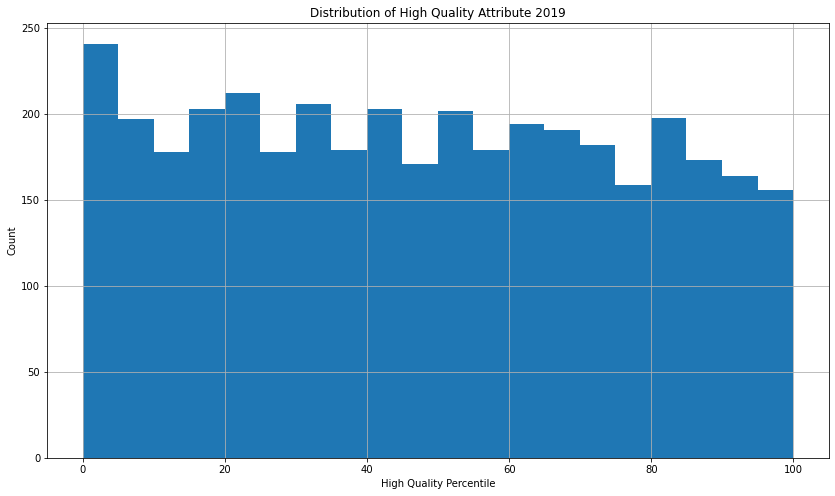

In [57]:
# A couple of values above stand out.
# Will be good to explore the disribution of these
# High Quality as an example and Obliging_R as one of the two that stand out as very low for a max score.

figure(figsize=(14, 8))
BAV_2019['High_Quality_R'].hist(bins=20)
plt.xlabel('High Quality Percentile')
plt.ylabel('Count')
plt.title('Distribution of High Quality Attribute 2019');

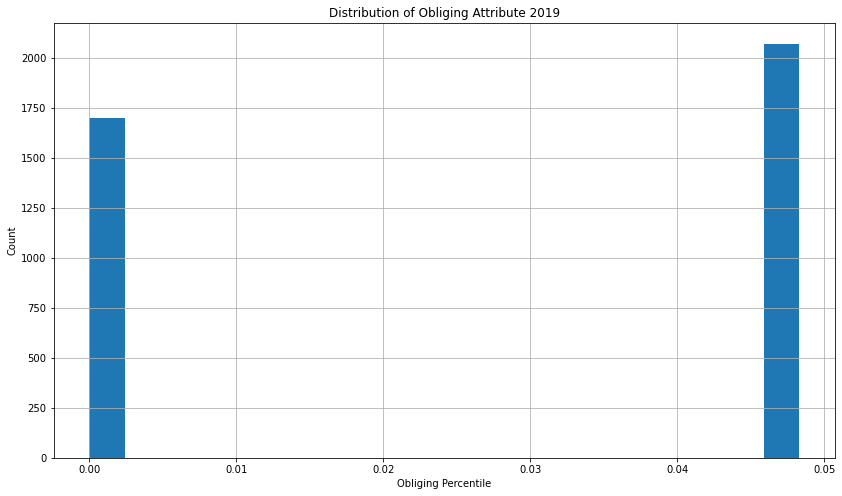

In [58]:
figure(figsize=(14, 8))
BAV_2019['Obliging_R'].hist(bins=20)
plt.xlabel('Obliging Percentile')
plt.ylabel('Count')
plt.title('Distribution of Obliging Attribute 2019');

***Finding:*** An e-mail to the team resulted in a quick explanation. Two attributes (Obliging and Restrained) were replaced in 2018 to 'Cool' and 'Creative'. The relic attributes were retained in the set to help with historic analyses. Since we're focused on 2018 forward, these relic columns can be dropped from both years.

In [59]:
del BAV_2019['Obliging_R']
del BAV_2019['Restrained_R']

In [60]:
del BAV_2018['Obliging_R']
del BAV_2018['Restrained_R']

In [62]:
# Make sure the two data frames' columns still match up
print('2018: {}'.format(BAV_2018.shape[1]))
print('2019: {}'.format(BAV_2019.shape[1]))

2018: 184
2019: 184


### Duplicate Companies

Some of the companies are present in multiple categories. There is a 'duplicate_index' column with a value of 1 to identify these.  
A 1 is present for each duplicated value only.

In [63]:
duplicate_companies_2019 = BAV_2019[BAV_2019['Dupl_Index'] == 1]
duplicate_companies_2018 = BAV_2018[BAV_2018['Dupl_Index'] == 1]

Noticed some whitespace in some of the brand IDs.

In [64]:
# Trim the whitespace on all IDs to clean up.
BAV_2019['Brand_ID'] = BAV_2019['Brand_ID'].str.strip()
BAV_2018['Brand_ID'] = BAV_2018['Brand_ID'].str.strip()

In [65]:
# Finding companies with more than 1 duplicate value
sorted_dups = duplicate_companies_2019.groupby("Brand_ID")['Dupl_Index'].sum()
sorted_dups = sorted_dups.sort_values(axis='index', ascending=False)
print(sorted_dups)

Brand_ID
WJZD    2
AHK     2
YQRV    2
AAI     1
NKG     1
       ..
BDMI    1
BDCV    1
BCU     1
BBYT    1
YXSH    1
Name: Dupl_Index, Length: 102, dtype: int64


In [66]:
BAV_2019[BAV_2019['Brand_ID'] == 'WJZD']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Under Armour,WJZD,0,C17,Athleisure/Athletic Clothing,Apparel & Accessories,3527.096924,3493,96.038651,86.328499,92.995171,...,NaN,NaN,NaN,NaN,-22391,641,268911,329227,Under Armour,UAA
Under Armour,WJZD,1,S01g,Athletic Shoes,Apparel & Accessories,3527.096924,3493,96.038651,86.328499,92.995171,...,NaN,NaN,NaN,NaN,-22391,747,268911,329227,Under Armour,UAA
Under Armour,WJZD,1,YPAT,Extreme Sports Clothing & Equipment,Sports,3527.096924,3493,96.038651,86.328499,92.995171,...,NaN,NaN,NaN,NaN,-22391,26160,268911,329227,Under Armour,UAA


In [67]:
BAV_2019[BAV_2019['Brand_ID'] == 'AHK']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Nabisco,AHK,0,F10,Cereals,Food,3748.606934,3823,31.690821,98.309181,96.714973,...,NaN,NaN,NaN,NaN,193,22,268911,329227,Nabisco,None
Nabisco,AHK,1,F22,Cookies & Biscuits (Crackers),Food,3748.606934,3823,31.690821,98.309181,96.714973,...,NaN,NaN,NaN,NaN,193,40,268911,329227,Nabisco,None
Nabisco,AHK,1,I01,Consumer Goods Companies,Corporations,3748.606934,3823,31.690821,98.309181,96.714973,...,NaN,NaN,NaN,NaN,193,39,268911,329227,Nabisco,None


In [68]:
BAV_2019[BAV_2019['Brand_ID'] == 'YQRV']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Newman`s Own,YQRV,1,F07,Ready-made Sauces such as Pasta & Barbecue Sauces,Food,3263.38501,3355,81.932365,83.478264,82.125603,...,NaN,NaN,NaN,NaN,23920,110,268911,329227,Newman`s Own,S
Newman`s Own,YQRV,1,F09d,Salsas & Dips,Food,3263.38501,3355,81.932365,83.478264,82.125603,...,NaN,NaN,NaN,NaN,23920,26735,268911,329227,Newman`s Own,S
Newman`s Own,YQRV,0,I01,Consumer Goods Companies,Corporations,3263.38501,3355,81.932365,83.478264,82.125603,...,NaN,NaN,NaN,NaN,23920,39,268911,329227,Newman`s Own,S


Appears as though these are in fact duplicate rows. The category plays no role in the attribute values. There is no problem dropping these duplicates (Anything with a 1 in the 'Dupl_Index' column, as 0 is the first occurance).

In [69]:
BAV_2019_clean = BAV_2019[~BAV_2019.index.duplicated()]

In [70]:
# Verify they're removed
# Test on YQRV
BAV_2019_clean[BAV_2019_clean['Brand_ID'] == 'YQRV']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Newman`s Own,YQRV,1,F07,Ready-made Sauces such as Pasta & Barbecue Sauces,Food,3263.38501,3355,81.932365,83.478264,82.125603,...,NaN,NaN,NaN,NaN,23920,110,268911,329227,Newman`s Own,S


In [71]:
# Finding companies with more than 1 duplicate value
sorted_dups = duplicate_companies_2018.groupby("Brand_ID")['Dupl_Index'].sum()
sorted_dups = sorted_dups.sort_values(axis='index', ascending=False)
print(sorted_dups)

Brand_ID
SBN     2
WJZD    2
YQRV    2
AHK     2
AAI     1
       ..
BBYT    1
BBN     1
BBG     1
BBEK    1
YXSH    1
Name: Dupl_Index, Length: 117, dtype: int64


In [72]:
BAV_2018[BAV_2018['Brand_ID'] == 'SBN']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Casper (Mattresses),SBN,1,H22a,Mattresses,Home & Garden,856.065674,850,89.810768,23.726347,29.500242,...,NaN,NaN,NaN,NaN,13069,27085,258039,314828,Casper (Mattresses),CSPR
Casper,SBN,1,H24,Home Design,Home & Garden,856.065674,850,89.810768,23.726347,29.500242,...,NaN,NaN,NaN,NaN,13069,26714,258039,314828,Casper,CSPR
Casper,SBN,0,R03,Specialty Retail Stores - Home/Office,Distribution/Retail,856.065674,850,89.810768,23.726347,29.500242,...,NaN,NaN,NaN,NaN,13069,122,258039,314828,Casper,CSPR


In [73]:
BAV_2018[BAV_2018['Brand_ID'] == 'YQRV']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Newman`s Own,YQRV,1,F07,Ready-made Sauces such as Pasta & Barbecue Sauces,Food,3430.964111,3513,73.410965,83.794273,82.629791,...,NaN,NaN,NaN,NaN,23920,110,258039,314828,Newman`s Own,S
Newman`s Own,YQRV,1,F09d,Salsas,Food,3430.964111,3513,73.410965,83.794273,82.629791,...,NaN,NaN,NaN,NaN,23920,26735,258039,314828,Newman`s Own,S
Newman`s Own,YQRV,0,I01,Consumer Goods Companies,Corporations,3430.964111,3513,73.410965,83.794273,82.629791,...,NaN,NaN,NaN,NaN,23920,39,258039,314828,Newman`s Own,S


Same finding for 2018. Safe to drop for 2018 as well.

In [74]:
BAV_2018_clean = BAV_2018[~BAV_2018.index.duplicated()]

In [75]:
# Verify they're removed
# Test on YQRV
BAV_2018_clean[BAV_2018_clean['Brand_ID'] == 'YQRV']

,Brand_ID,Dupl_Index,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Newman`s Own,YQRV,1,F07,Ready-made Sauces such as Pasta & Barbecue Sauces,Food,3430.964111,3513,73.410965,83.794273,82.629791,...,NaN,NaN,NaN,NaN,23920,110,258039,314828,Newman`s Own,S


In [76]:
# Drop the 'Dupl_Index' column since it's no longer needed
BAV_2019_clean.drop(['Dupl_Index'], axis=1)
BAV_2018_clean.drop(['Dupl_Index'], axis=1)

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Total_Unaided_pct,Wave,Year,Country,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1314.562012,1328,59.728287,20.912178,71.858322,73.459488,...,NaN,NaN,NaN,NaN,551,5,258039,314828,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,942.608582,961,94.080544,2.134886,27.947598,39.446869,...,NaN,NaN,NaN,NaN,1779,5,258039,314828,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,1040.751953,1065,94.323143,1.407084,26.880156,46.579330,...,NaN,NaN,NaN,NaN,8496,5,258039,314828,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1257.609009,1262,94.226105,11.159631,71.615723,72.052399,...,NaN,NaN,NaN,NaN,1,5,258039,314828,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1187.797974,1178,94.808342,1.746725,66.909264,58.563805,...,NaN,NaN,NaN,NaN,8502,5,258039,314828,Bentley,BSY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FactSet,BDCK,Z99d,Financial Information,"Financial Services, Insurance & Banks",641.026917,591,80.300827,71.518677,25.084909,5.385735,...,NaN,NaN,NaN,NaN,42090,488,258039,314828,FactSet,FDS
FICO,WODP,Z99d,Financial Information,"Financial Services, Insurance & Banks",2111.551025,2127,20.766619,89.082970,75.691414,61.863174,...,NaN,NaN,NaN,NaN,-25211,488,258039,314828,FICO,FICO
LifeLock,BDCU,Z99d,Financial Information,"Financial Services, Insurance & Banks",3395.215088,3446,76.322174,32.411449,78.408539,59.582726,...,NaN,NaN,NaN,NaN,42100,488,258039,314828,LifeLock,None


### Missing Values and Empty Columns

1. Identify columns with irrelevant and missing values. Remove
2. Impute anything overtly missing

In [77]:
missing_2019 = pd.concat([BAV_2019_clean.isnull().sum(), 100 * BAV_2019_clean.isnull().mean()], axis=1)
missing_2019.columns=['missing_count_2019', '%']
missing_2019.sort_values(by='missing_count_2019', ascending=False).head(10)

,missing_count_2019,%
Country,3661,100.000000
Year,3661,100.000000
Wave,3661,100.000000
Total_Unaided_pct,3661,100.000000
Top_of_Mind_pct,3661,100.000000
ticker_symbol,1790,48.893745
Trustworthy_R,0,0.000000
Sensuous_R,0,0.000000
Simple_R,0,0.000000
Social_R,0,0.000000


In [78]:
dropped_2019 = BAV_2019_clean.drop(['Country', 'Year', 'Wave', 'Total_Unaided_pct', 'Top_of_Mind_pct', 'Dupl_Index'], axis=1)

In [79]:
dropped_2019.head()

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1160.282959,1192,72.705315,19.082125,71.545891,71.642509,...,0,0,0,0,551,5,268911,329227,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,912.620789,927,91.980675,3.574879,17.681160,41.787441,...,0,0,0,0,1779,5,268911,329227,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,916.633179,918,97.101448,2.125604,52.705315,42.367149,...,0,0,0,0,8496,5,268911,329227,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1161.255005,1198,92.801933,16.038647,75.072464,69.275360,...,0,0,0,0,1,5,268911,329227,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1147.734985,1150,92.463768,2.608696,61.787441,56.763287,...,0,0,0,0,8502,5,268911,329227,Bentley,BSY


In [80]:
BAV_2019_clean = dropped_2019

In [81]:
BAV_2019_clean.head()

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1160.282959,1192,72.705315,19.082125,71.545891,71.642509,...,0,0,0,0,551,5,268911,329227,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,912.620789,927,91.980675,3.574879,17.681160,41.787441,...,0,0,0,0,1779,5,268911,329227,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,916.633179,918,97.101448,2.125604,52.705315,42.367149,...,0,0,0,0,8496,5,268911,329227,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1161.255005,1198,92.801933,16.038647,75.072464,69.275360,...,0,0,0,0,1,5,268911,329227,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1147.734985,1150,92.463768,2.608696,61.787441,56.763287,...,0,0,0,0,8502,5,268911,329227,Bentley,BSY


In [82]:
missing_2018 = pd.concat([BAV_2018_clean.isnull().sum(), 100 * BAV_2018_clean.isnull().mean()], axis=1)
missing_2018.columns=['missing_count_2018', '%']
missing_2018.sort_values(by='missing_count_2018', ascending=False).head(10)

,missing_count_2018,%
Country,3522,100.000000
Year,3522,100.000000
Wave,3522,100.000000
Total_Unaided_pct,3522,100.000000
Top_of_Mind_pct,3522,100.000000
ticker_symbol,1666,47.302669
Sector,1,0.028393
Unapproachable_R,0,0.000000
Simple_R,0,0.000000
Social_R,0,0.000000


In [83]:
dropped_2018 = BAV_2018_clean.drop(['Country', 'Year', 'Wave', 'Total_Unaided_pct', 'Top_of_Mind_pct', 'Dupl_Index'], axis=1)

In [84]:
dropped_2018.head()

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1314.562012,1328,59.728287,20.912178,71.858322,73.459488,...,0,0,0,0,551,5,258039,314828,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,942.608582,961,94.080544,2.134886,27.947598,39.446869,...,0,0,0,0,1779,5,258039,314828,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,1040.751953,1065,94.323143,1.407084,26.880156,46.579330,...,0,0,0,0,8496,5,258039,314828,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1257.609009,1262,94.226105,11.159631,71.615723,72.052399,...,0,0,0,0,1,5,258039,314828,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1187.797974,1178,94.808342,1.746725,66.909264,58.563805,...,0,0,0,0,8502,5,258039,314828,Bentley,BSY


In [85]:
BAV_2018_clean = dropped_2018
BAV_2018_clean.head()

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1314.562012,1328,59.728287,20.912178,71.858322,73.459488,...,0,0,0,0,551,5,258039,314828,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,942.608582,961,94.080544,2.134886,27.947598,39.446869,...,0,0,0,0,1779,5,258039,314828,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,1040.751953,1065,94.323143,1.407084,26.880156,46.579330,...,0,0,0,0,8496,5,258039,314828,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1257.609009,1262,94.226105,11.159631,71.615723,72.052399,...,0,0,0,0,1,5,258039,314828,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1187.797974,1178,94.808342,1.746725,66.909264,58.563805,...,0,0,0,0,8502,5,258039,314828,Bentley,BSY


Find and see if missing sector value from 2018 can be imputed.

In [86]:
BAV_2018_clean.loc[BAV_2018_clean['Sector'].isnull()]

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
WeLive,BLAL,T01o,Living Space/Apartments/Communities,NaN,429.231201,417,74.62397,71.373123,28.4328,1.940805,...,0,0,0,0,47447,811,258039,314828,WeLive,None


Interesting. I know from looking at this, this is part of the WeWork company. Not sure what sector to give it. Since the data is ordered by sector, will find the values above and below this one to see if we can impute one of those.

In [87]:
WeLive_index = BAV_2018_clean.index.get_loc('WeLive')
WeLive_prox = [WeLive_index-1, WeLive_index, WeLive_index+1]
BAV_2018_clean.iloc[WeLive_prox]

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Vivid Seats,BGQW,T01n,Tickets and Booking services,Travel & Entertainment,694.865784,654,68.898590,48.568657,25.764193,6.065017,...,0,0,0,0,44494,800,258039,314828,Vivid Seats,None
WeLive,BLAL,T01o,Living Space/Apartments/Communities,NaN,429.231201,417,74.623970,71.373123,28.432800,1.940805,...,0,0,0,0,47447,811,258039,314828,WeLive,None
Bellagio,WAAT,T02,"Travel, Vacation & Theme Parks",Travel & Entertainment,882.959412,867,80.446388,32.751091,55.992237,40.320232,...,0,0,0,0,-15673,141,258039,314828,Bellagio,None


In [88]:
BAV_2018_clean.at['WeLive', 'Sector'] = 'Travel & Entertainment'

In [89]:
print(BAV_2018_clean.at['WeLive', 'Sector'])

Travel & Entertainment


In [90]:
# Verify empty
BAV_2018_clean.loc[BAV_2018_clean['Sector'].isnull()]

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Would_miss_if_went_away_pct,Community_Engage_C,Product_Performance_C,Treatment_Understand_C,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,


In [91]:
zero_2019 = BAV_2019_clean.loc[:, (BAV_2019_clean == 0).all()]
print(zero_2019.columns)

Index(['Obliging_pct', 'Restrained_pct', 'DO NOT USE', 'Belong_to_a_club_pct',
       'Best_option_available_pct', 'Buy_on_sale_only_pct',
       'Fairly_priced_pct', 'Feel_loyal_pct', 'Goes_out_of_its_way_pct',
       'Identify_with_other_users_pct', 'Interested_learning_more_pct',
       'Interested_special_events_pct', 'Meets_my_needs_completely_pct',
       'My_kind_of_brand_pct', 'One_of_my_favorite_brands_pct',
       'Resolves_conflicts_well_pct', 'Strongest_relationship_pct',
       'Want_my_business_pct', 'Worth_a_premium_price_pct',
       'Would_miss_if_went_away_pct', 'Community_Engage_C',
       'Product_Performance_C', 'Treatment_Understand_C'],
      dtype='object')


In [92]:
# Drop zero only columns 2019
BAV_2019_cleaned = BAV_2019_clean.drop(['Obliging_pct', 'Restrained_pct', 'DO NOT USE', 'Belong_to_a_club_pct',
       'Best_option_available_pct', 'Buy_on_sale_only_pct',
       'Fairly_priced_pct', 'Feel_loyal_pct', 'Goes_out_of_its_way_pct',
       'Identify_with_other_users_pct', 'Interested_learning_more_pct',
       'Interested_special_events_pct', 'Meets_my_needs_completely_pct',
       'My_kind_of_brand_pct', 'One_of_my_favorite_brands_pct',
       'Resolves_conflicts_well_pct', 'Strongest_relationship_pct',
       'Want_my_business_pct', 'Worth_a_premium_price_pct',
       'Would_miss_if_went_away_pct', 'Community_Engage_C',
       'Product_Performance_C', 'Treatment_Understand_C'], axis=1)

In [93]:
BAV_2019_cleaned.head()

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,Do Not Use.3,Distant_C,DiagnosticsBase,Recommend_to_a_friend_pct,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1160.282959,1192,72.705315,19.082125,71.545891,71.642509,...,6.774314,6.849280,3927.775879,9.953999,551,5,268911,329227,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,912.620789,927,91.980675,3.574879,17.681160,41.787441,...,5.463263,9.425364,3927.775879,4.776871,1779,5,268911,329227,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,916.633179,918,97.101448,2.125604,52.705315,42.367149,...,5.717941,11.362800,3927.775879,5.559846,8496,5,268911,329227,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1161.255005,1198,92.801933,16.038647,75.072464,69.275360,...,6.408536,8.952747,3927.775879,9.149771,1,5,268911,329227,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1147.734985,1150,92.463768,2.608696,61.787441,56.763287,...,4.879201,11.695000,3927.775879,6.758671,8502,5,268911,329227,Bentley,BSY


In [94]:
zero_2018 = BAV_2018_clean.loc[:, (BAV_2018_clean == 0).all()]
print(zero_2018.columns)

Index(['DO NOT USE', 'Belong_to_a_club_pct', 'Best_option_available_pct',
       'Buy_on_sale_only_pct', 'Fairly_priced_pct', 'Feel_loyal_pct',
       'Goes_out_of_its_way_pct', 'Identify_with_other_users_pct',
       'Interested_learning_more_pct', 'Interested_special_events_pct',
       'Meets_my_needs_completely_pct', 'My_kind_of_brand_pct',
       'One_of_my_favorite_brands_pct', 'Resolves_conflicts_well_pct',
       'Strongest_relationship_pct', 'Want_my_business_pct',
       'Worth_a_premium_price_pct', 'Would_miss_if_went_away_pct',
       'Community_Engage_C', 'Product_Performance_C',
       'Treatment_Understand_C'],
      dtype='object')


In [95]:
# Drop zero only columns 2018
BAV_2018_cleaned = BAV_2018_clean.drop(['Obliging_pct', 'Restrained_pct', 'DO NOT USE', 'Belong_to_a_club_pct', 'Best_option_available_pct',
       'Buy_on_sale_only_pct', 'Fairly_priced_pct', 'Feel_loyal_pct',
       'Goes_out_of_its_way_pct', 'Identify_with_other_users_pct',
       'Interested_learning_more_pct', 'Interested_special_events_pct',
       'Meets_my_needs_completely_pct', 'My_kind_of_brand_pct',
       'One_of_my_favorite_brands_pct', 'Resolves_conflicts_well_pct',
       'Strongest_relationship_pct', 'Want_my_business_pct',
       'Worth_a_premium_price_pct', 'Would_miss_if_went_away_pct',
       'Community_Engage_C', 'Product_Performance_C',
       'Treatment_Understand_C'], axis=1)

In [96]:
BAV_2018_cleaned.head()

,Brand_ID,Category_CD,Category_NM,Sector,Brand_Base,Unweighted_Brand_Base,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,...,No_Nonsense_C,Distant_C,DiagnosticsBase,Recommend_to_a_friend_pct,Brand_Key,Category_Key,BaseID,BSS_ID,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,A01,Automobiles,Auto,1314.562012,1328,59.728287,20.912178,71.858322,73.459488,...,6.920542,6.546608,4128.00293,9.632626,551,5,258039,314828,Acura,None
Alfa Romeo,CQK,A01,Automobiles,Auto,942.608582,961,94.080544,2.134886,27.947598,39.446869,...,4.981933,10.927900,4128.00293,5.360558,1779,5,258039,314828,Alfa Romeo,RMO
Aston Martin,MKU,A01,Automobiles,Auto,1040.751953,1065,94.323143,1.407084,26.880156,46.579330,...,4.764266,10.235070,4128.00293,6.165359,8496,5,258039,314828,Aston Martin,None
Audi,AAA,A01,Automobiles,Auto,1257.609009,1262,94.226105,11.159631,71.615723,72.052399,...,7.041301,8.581500,4128.00293,8.403893,1,5,258039,314828,Audi,None
Bentley,MLA,A01,Automobiles,Auto,1187.797974,1178,94.808342,1.746725,66.909264,58.563805,...,5.260837,12.021740,4128.00293,6.453038,8502,5,258039,314828,Bentley,BSY


### Verify Data is in good shape

In [97]:
BAV_2019_cleaned[relevant_columns]

,Relevance_R,Esteem_R,Knowledge_R,Brand_Stature_R,Brand_Strength_R,Different_R,Distinctive_R,Unique_R,Dynamic_R,Innovative_R,...,Stylish_R,Traditional_R,Trendy_R,Trustworthy_R,Unapproachable_R,Up_To_Date_R,Upper_Class_R,Visionary_R,Worth_More_R,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Acura,19.082125,71.545891,71.642509,74.057968,41.884056,38.260868,83.961349,42.850243,86.183578,73.526573,...,90.483093,42.415459,74.154587,63.236713,61.062801,68.695656,94.782608,79.178741,73.091789,None
Alfa Romeo,3.574879,17.681160,41.787441,35.893719,39.227055,64.637680,97.342995,86.473427,91.545891,77.342995,...,91.739128,20.531401,60.483093,6.280193,92.077293,22.222221,98.502419,57.922707,69.227051,RMO
Aston Martin,2.125604,52.705315,42.367149,49.275364,44.637680,81.642509,99.178741,96.328499,94.589371,75.845413,...,94.444443,20.966183,65.458939,21.932367,98.019325,35.507248,99.227051,76.425117,75.410629,None
Audi,16.038647,75.072464,69.275360,74.927536,64.589371,53.381641,95.652176,78.599037,96.473427,85.700485,...,96.473427,30.289856,80.821259,58.067635,72.173912,64.299515,98.647346,67.922707,75.072464,None
Bentley,2.608696,61.787441,56.763287,61.594204,35.120773,72.560387,98.888885,88.454109,92.995171,51.352657,...,92.946861,63.478260,51.207729,21.014492,97.198067,35.893719,99.710144,59.468597,91.207733,BSY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thomson Reuters,47.681160,49.758453,14.975845,21.256039,39.516907,37.777779,22.801933,18.019323,78.502419,54.106281,...,6.328502,29.903381,23.574879,43.140095,61.545895,44.734299,58.550724,33.333332,11.111111,TRI
UltraFICO,81.932365,18.067633,11.111111,9.178744,73.526573,60.531403,14.830918,54.879227,78.019325,59.951691,...,49.516907,8.743961,19.951691,12.946860,94.830917,59.613525,59.806763,43.913044,41.111111,None
FlightAware,68.454109,51.787441,4.927536,12.173913,75.507248,84.782608,34.541061,54.009663,57.584541,89.806763,...,77.101448,46.811596,77.777779,19.178743,92.367149,86.763283,77.053139,57.681160,46.859905,None


In [98]:
BAV_2018_cleaned[relevant_columns]

,Relevance_R,Esteem_R,Knowledge_R,Brand_Stature_R,Brand_Strength_R,Different_R,Distinctive_R,Unique_R,Dynamic_R,Innovative_R,...,Stylish_R,Traditional_R,Trendy_R,Trustworthy_R,Unapproachable_R,Up_To_Date_R,Upper_Class_R,Visionary_R,Worth_More_R,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Acura,20.912178,71.858322,73.459488,74.915092,35.128578,38.961670,72.731682,36.923824,74.090248,69.383797,...,90.101891,10.965550,73.896164,62.785057,66.472588,57.836002,93.498299,85.929161,58.466763,None
Alfa Romeo,2.134886,27.947598,39.446869,39.543911,37.020863,80.397865,97.816597,91.848618,94.517227,50.606503,...,91.703056,20.329937,75.109169,11.644833,98.010674,49.102379,98.447357,44.347404,79.815620,RMO
Aston Martin,1.407084,26.880156,46.579330,43.085880,31.246967,80.009705,98.495872,91.606018,91.120811,63.949539,...,91.120811,2.328967,55.749638,11.887433,97.185829,9.024745,99.369240,56.914120,81.125664,None
Audi,11.159631,71.615723,72.052399,74.332848,63.027657,61.475014,94.808342,85.201355,96.846191,87.142166,...,93.837944,36.923824,80.252304,32.411449,81.659386,56.720039,97.719551,73.750603,81.901993,None
Bentley,1.746725,66.909264,58.563805,64.531784,36.875301,81.125664,99.223679,97.573990,88.937408,47.743813,...,95.099464,68.413391,59.485687,34.788937,98.835518,26.491995,99.805916,52.547306,90.781174,BSY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FactSet,71.518677,25.084909,5.385735,5.919456,81.465309,89.034447,40.999516,81.028625,80.640465,74.526932,...,48.617176,45.366325,67.006310,49.878700,93.013100,75.836975,59.437168,68.850075,31.635128,FDS
FICO,89.082970,75.691414,61.863174,72.343521,63.755459,17.709850,27.025715,21.300339,43.813683,37.409023,...,19.553616,56.089275,14.653081,76.904419,77.535179,67.879669,37.166424,54.051430,18.292091,FICO
LifeLock,32.411449,78.408539,59.582726,72.440559,57.738960,50.800583,50.557983,68.801552,73.556526,93.110138,...,5.143135,5.579815,44.492966,91.557495,39.883553,91.169334,66.957787,95.245026,76.467735,None


In [99]:
BAV_2019_cleaned.dtypes.value_counts()

float64    144
object       6
int64        5
dtype: int64

In [100]:
BAV_2018_cleaned.dtypes.value_counts()

float64    144
object       6
int64        5
dtype: int64

### Save Data

Looking good. Let's save these files out.

In [133]:
BAV_2018_cleaned.to_csv("../data/BAV_2018.csv")

In [134]:
BAV_2019_cleaned.to_csv("../data/BAV_2019.csv")

### Next Steps

- A few clean-up items remain: Additional data remaining to collect using the stock ticker values to gather financial data on each matched company. This will be done in a future phase with the Polygon and/or y2fin APIs. 


- Beyond clean-up, the next step will be to explore the data and identify any trends in an Exploratory Data Analysis notebook.